All instructions are provided for R. I am going to reproduce them in Python as best as I can.

# Preface

From the textbook, p.171:
> In this problem, you will develop a model to predict whether a given
car gets high or low gas mileage based on the `Auto` data set.

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, \
                                          QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


%matplotlib inline
sns.set()

In [2]:
auto = pd.read_csv('https://www.statlearning.com/s/Auto.csv', index_col=0)
auto = auto[auto != '?'].dropna().reset_index()
auto.horsepower = auto.horsepower.astype(int)
auto.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite


Columns:
1. `mpg` &mdash; miles per gallon.
1. `cylinders` &mdash; number of cylinders between 4 and 8.
1. `displacement` &mdash; engine displacement (cu. inches).
1. `horsepower` &mdash; engine horsepower.
1. `weight` &mdash; vehicle weight (lbs.).
1. `acceleration` &mdash; time to accelerate from 0 to 60 mph (sec.).
1. `year` &mdash; model year (modulo 100).
1. `origin` &mdash; origin of car (1. American, 2. European, 3. Japanese)
1. `name` &mdash; vehicle name.

# (a)

From the textbook p.172:
> Create a binary variable, `mpg01`, that contains a 1 if `mpg` contains a value above its median, and a 0 if `mpg` contains a value below its median. You can compute the median using the `median()` function. Note you may find it helpful to use the `data.frame()` function to create a single data set containing both `mpg01` and the other `Auto` variables.

In [3]:
auto['mpg01'] = 0
auto.loc[auto.mpg >= auto.mpg.median(), 'mpg01'] = 1

# (b)

From the textbook p.172:
> Explore the data graphically in order to investigate the association between `mpg01` and the other features. Which of the other features seem most likely to be useful in predicting `mpg01`? Scatterplots and boxplots may be useful tools to answer this question. Describe your findings.

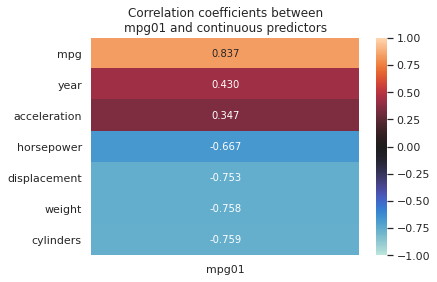

In [4]:
ax = sns.heatmap((auto.drop(['mpg01', 'origin'], axis='columns')
                      .corrwith(auto.mpg01)
                      .sort_values(ascending=False)
                      .to_frame()
                 )
                 , vmin=-1
                 , vmax=1
                 , cmap='icefire'
                 , annot=True
                 , fmt='.3f'
)
plt.title('Correlation coefficients between\nmpg01 and continuous predictors')
ax.set_xticklabels(['mpg01'])
plt.show()

1. High correlation with `mpg`, obviously.
1. Moderate negative correlations with `horsepower`, `displacement`, `weight`, `cylinders`.
1. Weak correlations with `year` and `acceleration`.

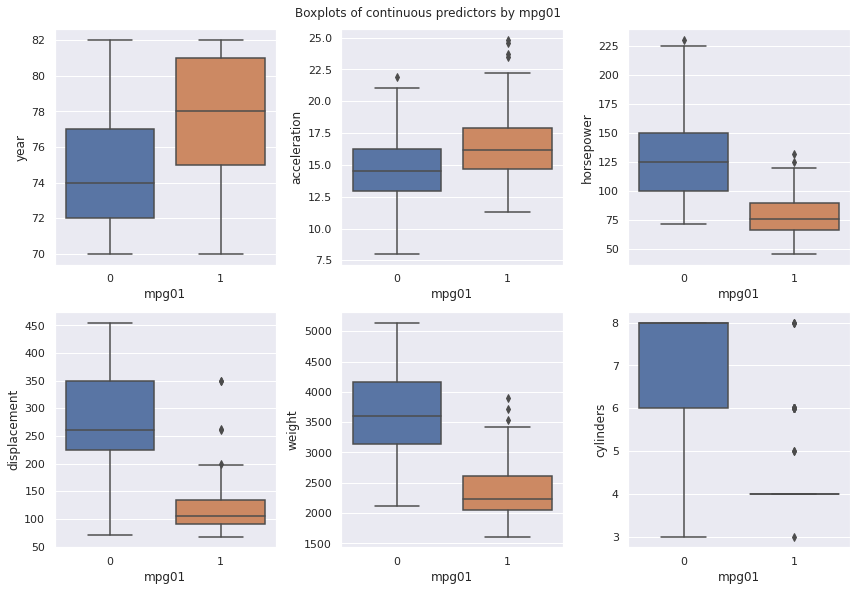

In [5]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
axs = axs.flatten()
for pred, ax in zip(['year'
                     , 'acceleration'
                     , 'horsepower'
                     , 'displacement'
                     , 'weight'
                     , 'cylinders'
                    ]
                    , axs
                   ):
  sns.boxplot(x='mpg01', y=pred, data=auto, ax=ax)

plt.suptitle('Boxplots of continuous predictors by mpg01', y=1.02)
plt.tight_layout()

The boxplots tell roughly the same story.

# (c)

From the textbook p.172:
> Split the data into a training set and a test set.

In [6]:
y = auto.mpg01
x = auto.drop(['name', 'mpg01', 'mpg'], axis='columns')
x_train, x_test, y_train, y_test = train_test_split(x, y)

# (d)

From the textbook p.172:
> Perform LDA on the training data in order to predict `mpg01` using the variables that seemed most associated with `mpg01` in (b). What is the test error of the model obtained?

In [7]:
def test_model(model, x_train, x_test, y_train, y_test, *args, **kwargs): 
  model.fit(x_train[['horsepower'
                     , 'displacement'
                     , 'weight'
                     , 'cylinders'
                    ]
                   ]
            , y_train
           )
  y_pred = model.predict(x_test[['horsepower', 'displacement', 'weight', 'cylinders']])
  return accuracy_score(y_test, y_pred)

print(test_model(LinearDiscriminantAnalysis()
                 , x_train
                 , x_test
                 , y_train
                 , y_test
                )
)

0.9183673469387755


The test error is 8.2%.

# (e)

From the textbook p.172:
> Perform QDA on the training data in order to predict `mpg01` using the variables that seemed most associated with `mpg01` in (b). What is the test error of the model obtained?

In [8]:
print(test_model(QuadraticDiscriminantAnalysis()
                 , x_train
                 , x_test
                 , y_train
                 , y_test
                )
)

0.9285714285714286


The test error is 6.1%. Which is better.

# (f)

From the textbook p.172:
> Perform logistic regression on the training data in order to predict `mpg01` using the variables that seemed most associated with `mpg01` in (b). What is the test error of the model obtained?

In [9]:
print(test_model(LogisticRegression()
                 , x_train
                 , x_test
                 , y_train
                 , y_test
                )
)

0.9183673469387755


The test error is 9.2%. Worse than both QDA and LDA.

# (g)

From the textbook p.172:
> Perform KNN on the training data, with several values of K, in order to predict `mpg01`. Use only the variables that seemed most associated with `mpg01` in (b). What test errors do you obtain? Which value of K seems to perform the best on this data set?

In [10]:
for n in range(1, 11):

  print(n
        , test_model(KNeighborsClassifier(n_neighbors=n)
                     , x_train
                     , x_test
                     , y_train
                     , y_test
                    )
  )

1 0.8571428571428571
2 0.8367346938775511
3 0.8673469387755102
4 0.8775510204081632
5 0.8877551020408163
6 0.8877551020408163
7 0.8775510204081632
8 0.8877551020408163
9 0.8775510204081632
10 0.8877551020408163


The best test error with KNN is 5.1% (K = 9).